
# Simple Exploration Notebook - Loan Data

### About the dataset:

This dataset from [Kaggle](https://www.kaggle.com/zhijinzhai/loandata "Kaggle") includes loan payoff data together with some basic demographic information about the customers. The financial product is a [bullet loan](https://en.wikipedia.org/wiki/Bullet_loan "bullet loan") where the entire loan amount is due at the end of the loan term (no installments).

### Goal of the notebook:

The goal is to analyze, explore and visualize data using python libraries pandas, numpy, matplotlib and seaborn.

I will start with loading the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

Exploratory data analysis.

In [2]:
df = pd.read_csv('Loandata.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
df.shape

(500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [6]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## Data cleaning

### Missing values

By looking at the df.info() method above there are 2 columns with missing (NaN) values: 

- paid_off_time and 
- past_due_days.

Checking the loan_status for those entries:

In [7]:
df_no_paid_off_time = df[df['paid_off_time'].isnull()]
print('Rows with no paid_off_time entry have the loan_status:' + df_no_paid_off_time['loan_status'].unique())

df_no_past_days = df[df['past_due_days'].isnull()]
print('Rows with no past_due_days entry have the loan_status:' + df_no_past_days['loan_status'].unique())

['Rows with no paid_off_time entry have the loan_status:COLLECTION']
['Rows with no past_due_days entry have the loan_status:PAIDOFF']


As expected, the NaN values are not an issue since these are coming from loans which:

- are not paid off yet (paid_off_time NaN, loan status COLLECTION)
- are paid on time (past_due_days NaN, loan status PAIDOFF)

### Data types


There are also 3 columns which have been imported as the generic object type where the datetime type would be more appropriate.

Additionally, as the paid_off_time column included a timestamp, I decided to drop it for practical reasons.

In [8]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])

# removing the timestamp from the last column

df['paid_off_time']= pd.DatetimeIndex(df['paid_off_time']).normalize()

Verifying that it worked:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
paid_off_time     400 non-null datetime64[ns]
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.0+ KB


## Grapical EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa0b3b4e80>,
      dtype=object)

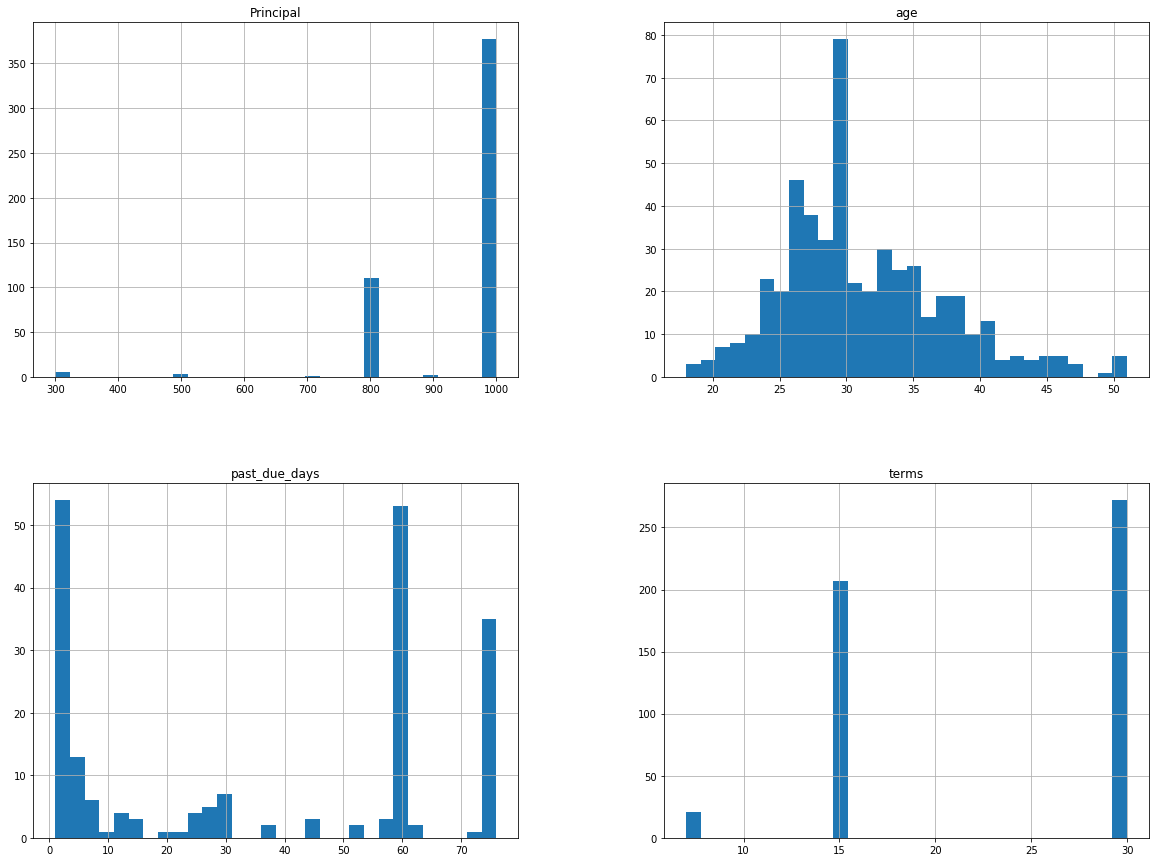

In [10]:
df.hist(bins=30, figsize=(20,15))

In the next few cells I'm going to do graphical EDA with focus on the loan_status column.

First, I will identify the unique values and the distribution.

In [11]:
print('The unique loan status are:') 
print(df['loan_status'].unique())

The unique loan status are:
['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


Text(0,0.5,'Number of loans')

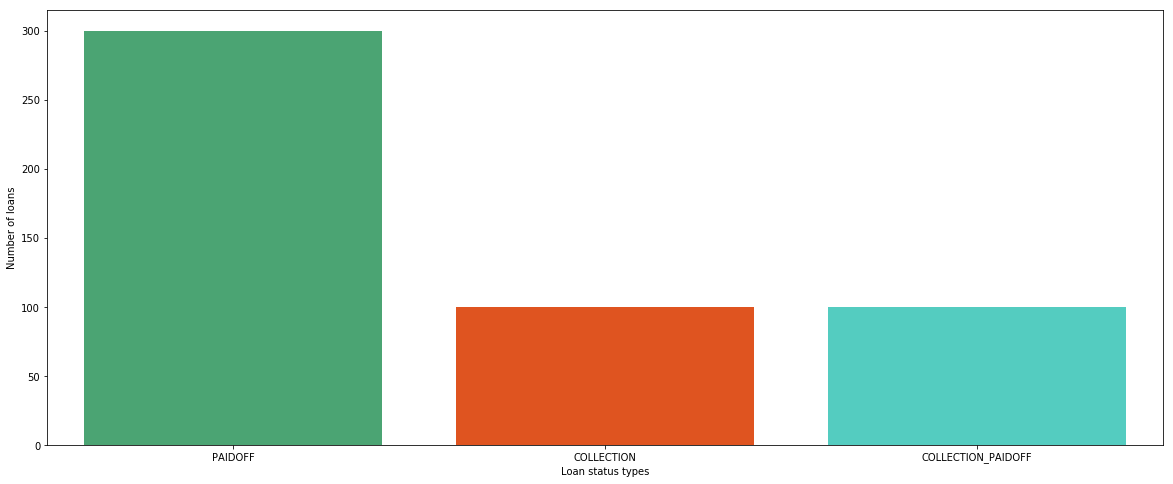

In [59]:
# defining a variable to assign more intuitive bar colors

status_colors = {'PAIDOFF':'mediumseagreen','COLLECTION':'orangered','COLLECTION_PAIDOFF':'turquoise'}

plt.figure(figsize=(20,8))
sns.countplot(x='loan_status', data=df, palette=status_colors)
plt.xlabel('Loan status types')
plt.ylabel('Number of loans')

Next, plotting loan_status in combination with the demographic information.

Text(0,0.5,'Number of loans')

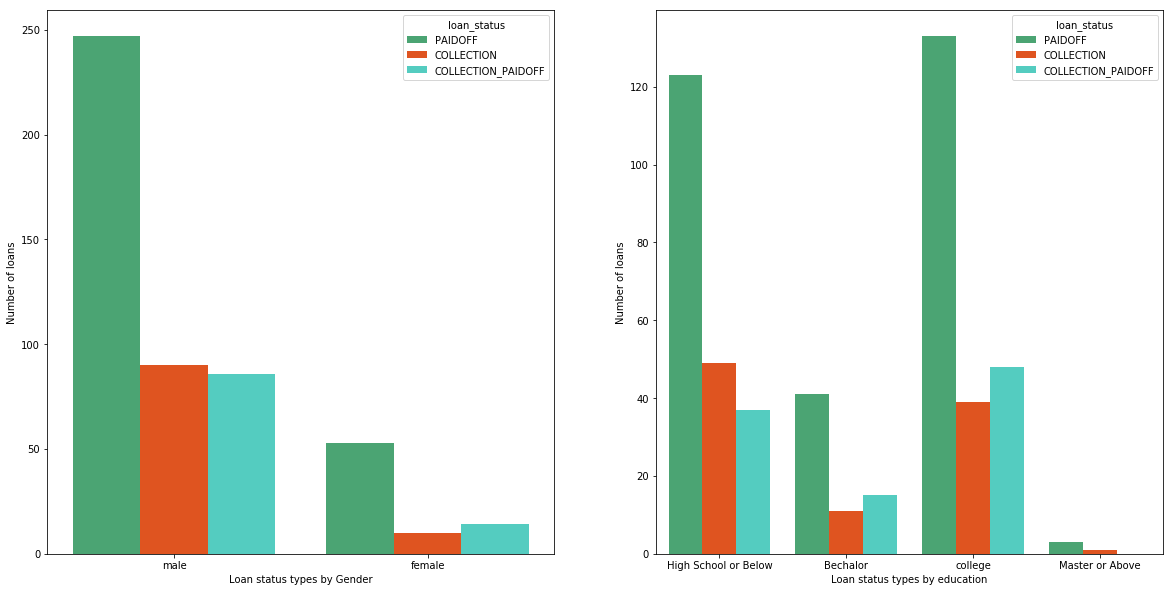

In [60]:
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x = "Gender", hue = "loan_status", data=df, ax=axes[0],palette=status_colors)
axes[0].set_xlabel('Loan status types by Gender')
axes[0].set_ylabel('Number of loans')

sns.countplot(x = "education", hue = "loan_status", data=df, ax=axes[1],palette=status_colors)
axes[1].set_xlabel('Loan status types by education')
axes[1].set_ylabel('Number of loans')

Text(0,0.5,'Number of loans')

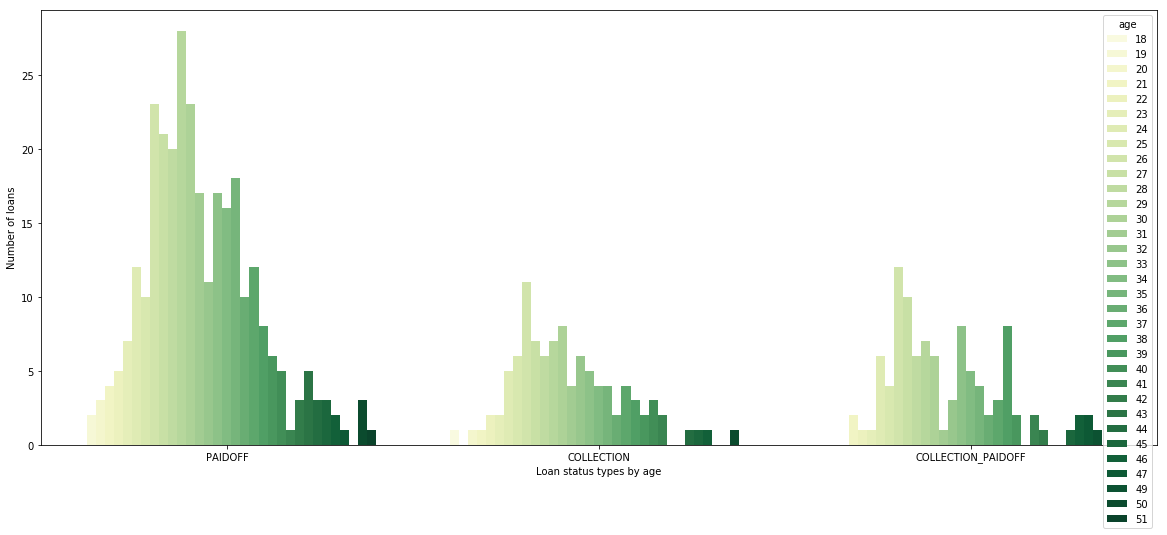

In [84]:
# using different color palette since the loan status colors dont fit here

plt.figure(figsize=(20,8))
sns.countplot(x='loan_status',hue='age', data=df, palette='YlGn')
plt.xlabel('Loan status types by age')
plt.ylabel('Number of loans')

The last plot again but now with age grouped in 5-year-bins for better readabilty:

Text(0,0.5,'Number of loans')

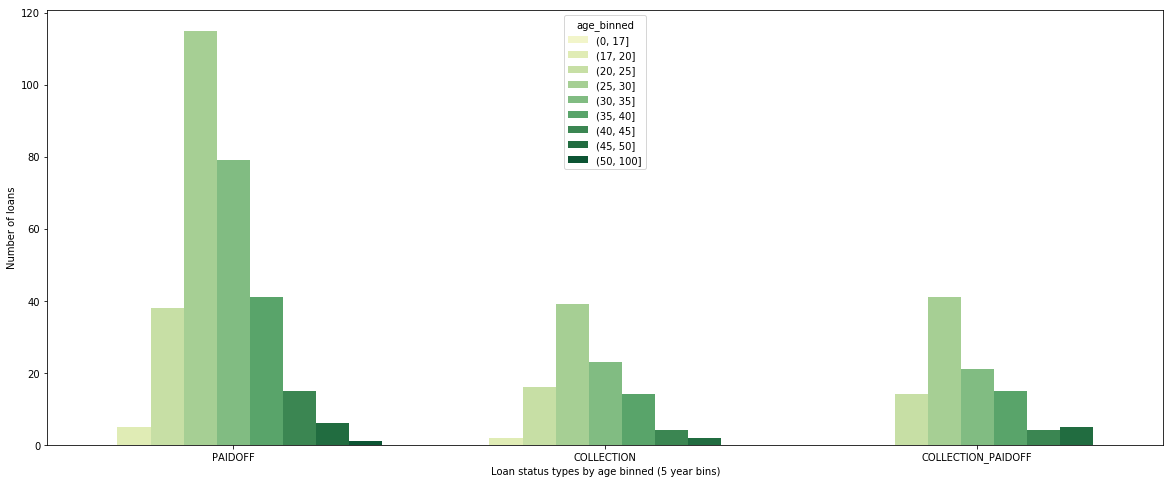

In [52]:
bins = [0, 17, 20, 25, 30, 35, 40, 45, 50, 100]
df['age_binned'] = pd.cut(df['age'], bins)

plt.figure(figsize=(20,8))
sns.countplot(x='loan_status',hue='age_binned', data=df,palette='YlGn')
plt.xlabel('Loan status types by age binned (5 year bins)')
plt.ylabel('Number of loans')

Now adding the date columns to the analysis as well.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

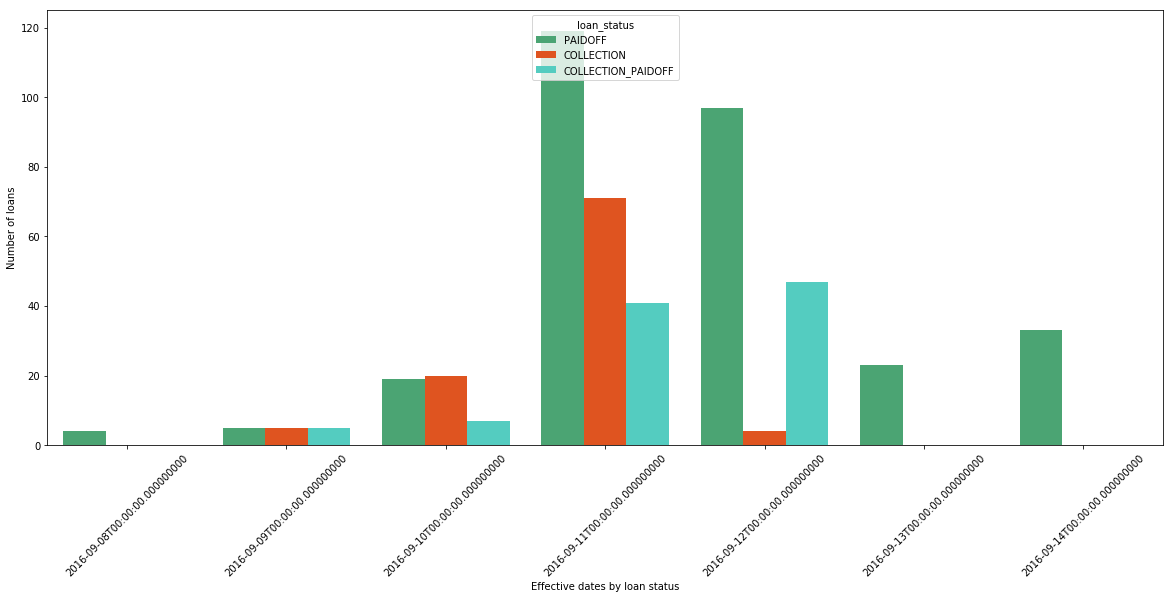

In [61]:
plt.figure(figsize=(20,8))
sns.countplot(x='effective_date',hue='loan_status', data=df,palette=status_colors)
plt.xlabel('Effective dates by loan status')
plt.ylabel('Number of loans')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

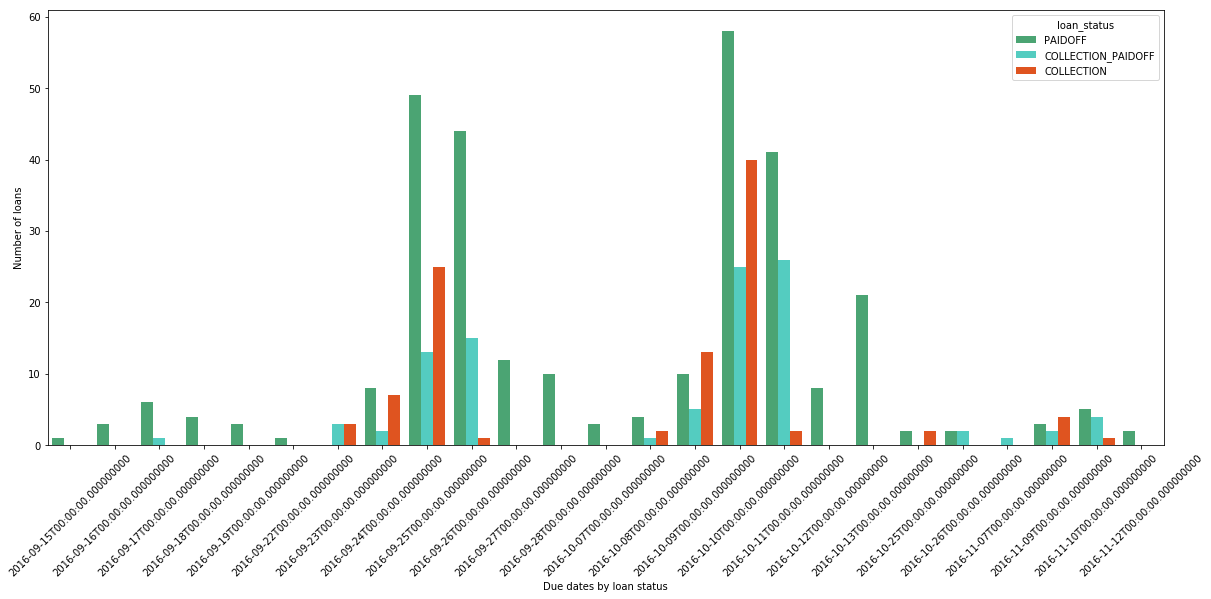

In [62]:
# For the due_dates column I had to create a new dataframe where the entries are
# sorted by this column as this was not the case in the original dataframe

df_sorted_by_due_date = df.sort_values('due_date', ascending=False)

plt.figure(figsize=(20,8))
sns.countplot(x='due_date',hue='loan_status', data=df_sorted_by_due_date,palette=status_colors)
plt.xlabel('Due dates by loan status')
plt.ylabel('Number of loans')
plt.xticks(rotation=45)

Creating a new date column called 'paid vs due date' showing the difference in days between the payoff date and the due date and plotting as boxplot.


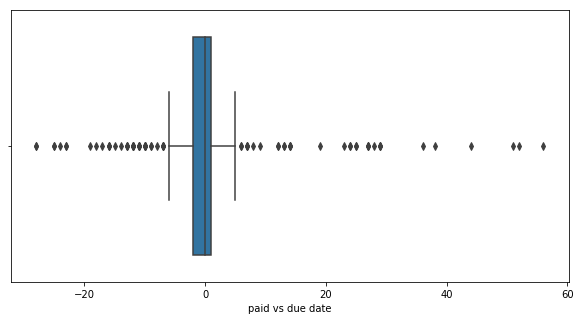

In [77]:
df['paid vs due date'] = (df['paid_off_time'] - df['due_date']).dt.days

plt.figure(figsize=(10,5))
sns.boxplot(x='paid vs due date', data=df)

I binned the new column in 15 day intervals to make it easier to read on a countplot.

Text(0,0.5,'Number of loans')

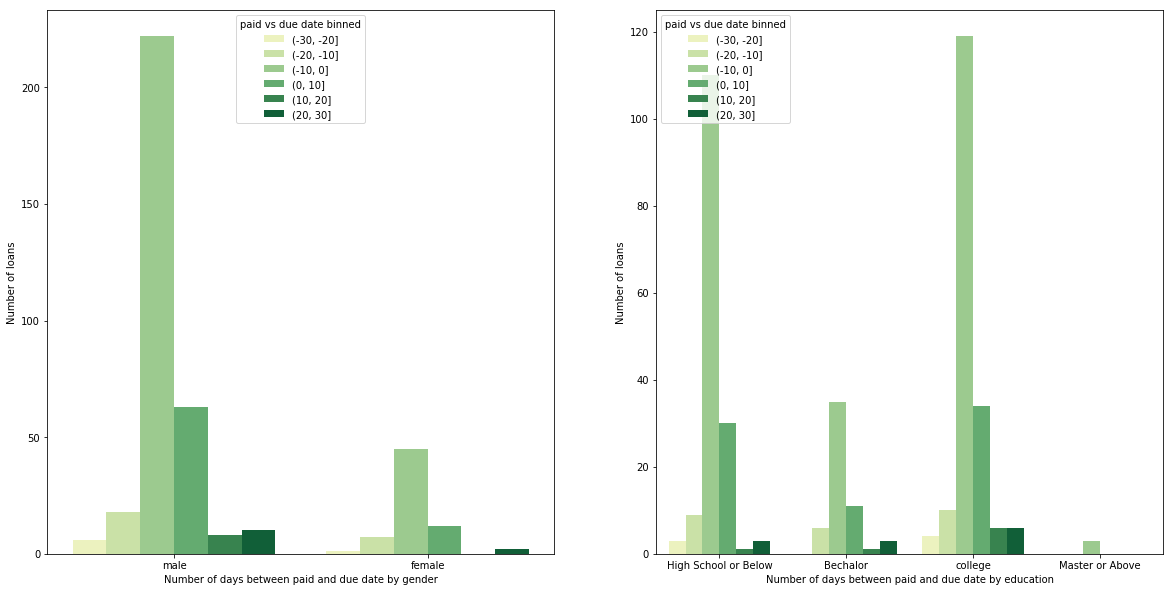

In [85]:
bins = [-30,-20, -10, 0, 10, 20, 30,]
df['paid vs due date binned'] = pd.cut(df['paid vs due date'], bins)

fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.countplot(x = "Gender", hue = "paid vs due date binned", data=df, ax=axes[0],palette='YlGn')
axes[0].set_xlabel('Number of days between paid and due date by gender')
axes[0].set_ylabel('Number of loans')

sns.countplot(x = "education", hue = "paid vs due date binned", data=df, ax=axes[1],palette='YlGn')
axes[1].set_xlabel('Number of days between paid and due date by education')
axes[1].set_ylabel('Number of loans')